#Clasificador de imágenes de rayos X usando Transfer Learning

####Desarrollado por Ricardo Daniel Bermúdez La Corte

####Tutora: Prof. Yaneth Moreno

In [ ]:
import os
import numpy as np
import cv2                 
from random import shuffle
from tqdm import tqdm  
import tensorflow as tf 
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from collections import Counter

import pathlib
import urllib
import tarfile
import shutil 
import pandas as pd
from tensorflow import keras

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/model_densenet.h5" "/content/" 

In [ ]:
model_densenet = tf.keras.models.load_model('model_densenet.h5', custom_objects={'categorical_smooth_loss': categorical_smooth_loss})

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ricardobermudez","key":"a00045a387a55c7702f25660da027814"}'}

In [ ]:

!  mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia


mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 2.05G/2.06G [00:34<00:00, 49.9MB/s]
100% 2.06G/2.06G [00:34<00:00, 63.4MB/s]


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data

In [ ]:

!  mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip covid19-radiography-database.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Nor

In [ ]:
from PIL import Image

l=os.listdir('/content/COVID-19_Radiography_Dataset/Normal/images')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/COVID-19_Radiography_Dataset/Normal/images/'+file+'.png')
  im1.save(r'/content/COVID-19_Radiography_Dataset/Normal/'+file+'.png')

l=os.listdir('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/'+file+'.png')
  im1.save(r'/content/COVID-19_Radiography_Dataset/Lung_Opacity/'+file+'.png')

l=os.listdir('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/'+file+'.png')
  im1.save(r'/content/COVID-19_Radiography_Dataset/Viral Pneumonia/'+file+'.png')

l=os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/COVID-19_Radiography_Dataset/COVID/images/'+file+'.png')
  im1.save(r'/content/COVID-19_Radiography_Dataset/COVID/'+file+'.png')

In [ ]:
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Normal/images')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Normal/masks')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/COVID/images')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/COVID/masks')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Lung_Opacity/masks')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images')
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/masks')

In [ ]:

l=os.listdir('/content/Data/test/COVID19')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/Data/test/COVID19/'+file+'.jpg')
  im1.save(r'/content/COVID-19_Radiography_Dataset/COVID/'+file+'.png')

l=os.listdir('/content/Data/train/COVID19')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/Data/train/COVID19/'+file+'.jpg')
  im1.save(r'/content/COVID-19_Radiography_Dataset/COVID/'+file+'.png')  

l=os.listdir('/content/Data/test/PNEUMONIA')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/Data/test/PNEUMONIA/'+file+'.jpg')
  im1.save(r'/content/COVID-19_Radiography_Dataset/Viral Pneumonia/'+file+'.png')

l=os.listdir('/content/Data/train/PNEUMONIA')
directory=[x.split('.')[0] for x in l]

for file in directory:
  im1 = Image.open(r'/content/Data/train/PNEUMONIA/'+file+'.jpg')
  im1.save(r'/content/COVID-19_Radiography_Dataset/Viral Pneumonia/'+file+'.png')  

In [ ]:
#En caso de necesitar reiniciar

shutil.rmtree('/content/Data')

In [ ]:
shutil.rmtree('/content/COVID-19_Radiography_Dataset')

In [ ]:


!mkdir COVID-19_Radiography_Dataset/Nor


In [ ]:
carpeta_fuente = '/content/COVID-19_Radiography_Dataset/Normal'
carpeta_destino = '/content/COVID-19_Radiography_Dataset/Nor'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 5400:
    
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:

!ls /content/COVID-19_Radiography_Dataset/Nor | wc -l


5400


In [ ]:
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Normal')

## Explor data folders

In [ ]:


!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/COVID-19_Radiography_Dataset', output="/content/Data", seed=1337, ratio=(0.8,0,0.2))  

Copying files: 16373 files [00:03, 5013.76 files/s]


In [ ]:
shutil.rmtree('/content/Data/test/.ipynb_checkpoints')
shutil.rmtree('/content/Data/train/.ipynb_checkpoints')


In [ ]:


TrainImage="/content/Data/train"
TestImage="/content/Data/test"
Normalimages = os.listdir(TrainImage + "/Normal")
Pneumoniaimages = os.listdir(TrainImage + "/Viral Pneumonia")
COVID19images = os.listdir(TrainImage + "/COVID")
LungOpacityimages = os.listdir(TrainImage + "/Lung_Opacity")

testNormalimages = os.listdir(TestImage + "/Normal")
testPneumoniaimages = os.listdir(TestImage + "/Viral Pneumonia")
testCOVID19images = os.listdir(TestImage + "/COVID")
testLungOpacityimages = os.listdir(TestImage + "/Lung_Opacity")


In [ ]:

print(len(Normalimages), len(COVID19images), len(LungOpacityimages), len(Pneumoniaimages))
NUM_TRAINING_IMAGES = len(Normalimages)  + len(COVID19images) + len(LungOpacityimages) + len(Pneumoniaimages)
print(NUM_TRAINING_IMAGES)

4320 2892 4809 1076
13097


In [ ]:

print(len(testNormalimages), len(testCOVID19images), len(testLungOpacityimages), len(testPneumoniaimages))
NUM_TESTING_IMAGES = len(testNormalimages)  + len(testCOVID19images) + len(testLungOpacityimages) + len(testPneumoniaimages)
print(NUM_TESTING_IMAGES)

1080 724 1203 269
3276


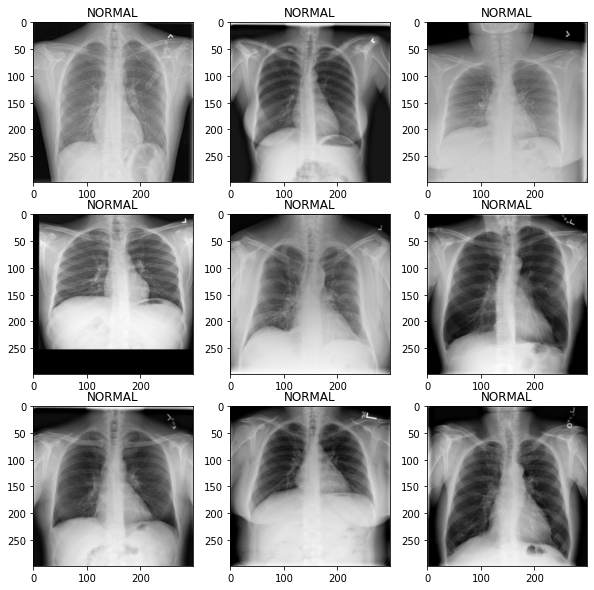

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/Normal",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")
plt.show()

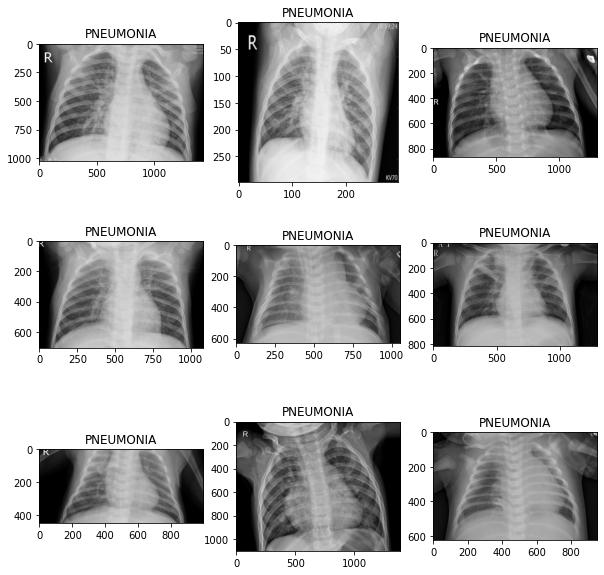

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/Viral Pneumonia",Pneumoniaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
plt.show()

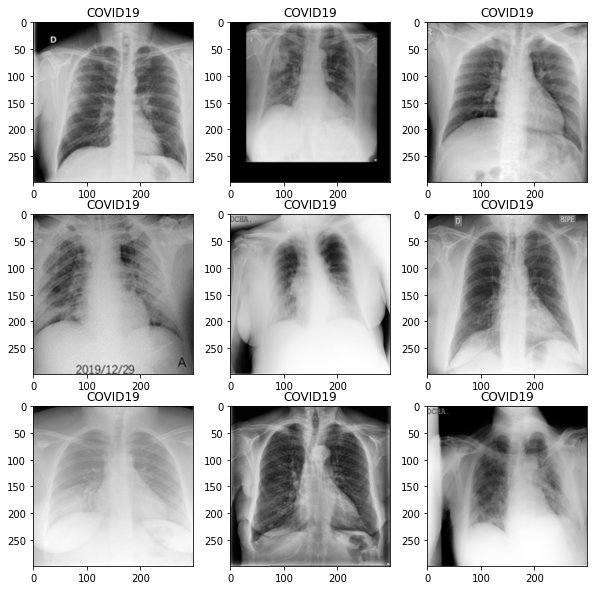

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/COVID",COVID19images[i])),cmap='gray')
    plt.title("COVID19")
plt.show()

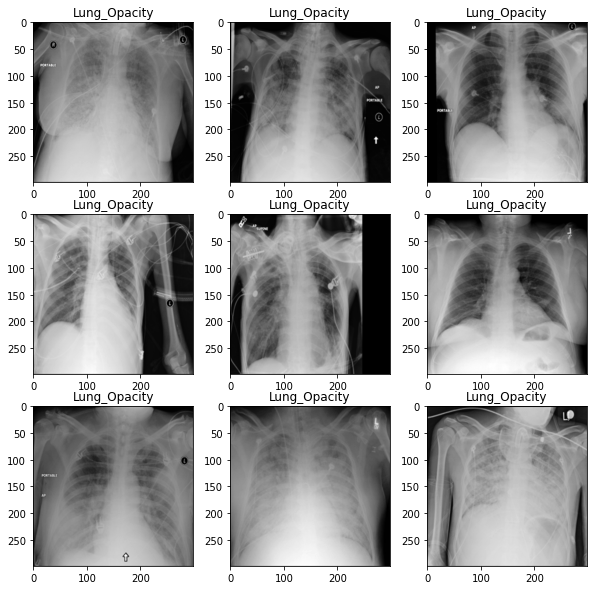

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/Lung_Opacity",LungOpacityimages[i])),cmap='gray')
    plt.title("Lung_Opacity")
plt.show()

## Data sets 

In [ ]:

image_size = 224 
BATCH_SIZE =  16 
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

data_path = '/content/Data'

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory(data_path + '/train',
                                                 target_size = (image_size, image_size),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

testing_set = test_datagen.flow_from_directory(data_path + '/test',
                                            target_size = (image_size, image_size),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 13097 images belonging to 4 classes.
Found 3276 images belonging to 4 classes.


In [ ]:


valid_set = test_datagen.flow_from_directory(data_path + '/test',
                                            target_size = (image_size, image_size),
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle = False)

Found 3276 images belonging to 4 classes.


In [ ]:

print("train batch ", training_set.__getitem__(0)[0].shape)
print("test batch ", testing_set.__getitem__(0)[0].shape)
print("sample train label \n", training_set.__getitem__(0)[1][:5])

train batch  (32, 224, 224, 3)
test batch  (32, 224, 224, 3)
sample train label 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
training_set.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [ ]:
testing_set.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

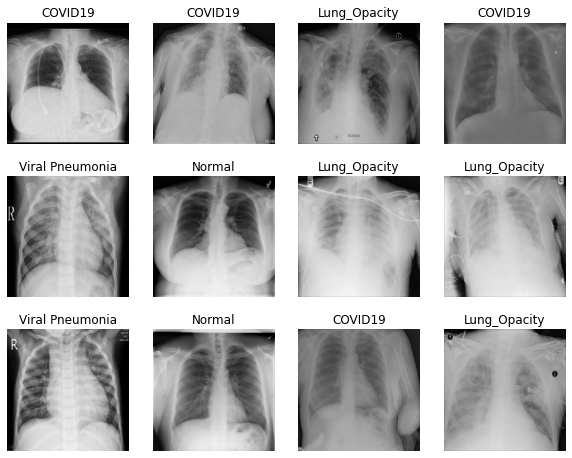

In [ ]:
labels = ['COVID19', 'Lung_Opacity','Normal', 'Viral Pneumonia']

sample_data = testing_set.__getitem__(1)[0] 
sample_label = testing_set.__getitem__(1)[1] 

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

## Models

### Preparacion

In [ ]:
!pip install efficientnet
import efficientnet.tfkeras as efn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.4 MB/s 


In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: 
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:

def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [ ]:

MCP_callback = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5',verbose=1 , save_best_only=True, monitor='val_accuracy')

In [ ]:

print(tf.keras.applications.DenseNet201(weights='imagenet').input_shape)
print(efn.EfficientNetB7(weights='imagenet').input_shape) 

## Pretrained densenet

In [ ]:


pretrained_densenet = tf.keras.applications.DenseNet201(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False) #, class_weight=class_weights     original 'imagenet'

for layer in pretrained_densenet.layers:
  layer.trainable = True 

x1 = pretrained_densenet.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(4, activation='softmax', name="predictions_head")(x1)

model_densenet = Model(inputs=pretrained_densenet.input, outputs=model_out)
model_densenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=categorical_smooth_loss,metrics=['accuracy'])



model_densenet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_6[0][0]']       
                                )                                                           

In [ ]:
history_densenet = model_densenet.fit(training_set, validation_data=testing_set, callbacks=[MCP_callback], epochs=8) 

Epoch 1/4
531/531 [==============================] - ETA: 0s - loss: 0.5266 - accuracy: 0.7943
Epoch 1: val_accuracy did not improve from 0.94936
531/531 [==============================] - 249s 447ms/step - loss: 0.5266 - accuracy: 0.7943 - val_loss: 0.2933 - val_accuracy: 0.8905 - lr: 1.0000e-04
Epoch 2/4
531/531 [==============================] - ETA: 0s - loss: 0.3350 - accuracy: 0.8757
Epoch 2: val_accuracy did not improve from 0.94936
531/531 [==============================] - 228s 429ms/step - loss: 0.3350 - accuracy: 0.8757 - val_loss: 0.2517 - val_accuracy: 0.9081 - lr: 1.0000e-04
Epoch 3/4
531/531 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.8996
Epoch 3: val_accuracy did not improve from 0.94936
531/531 [==============================] - 227s 428ms/step - loss: 0.2775 - accuracy: 0.8996 - val_loss: 0.2346 - val_accuracy: 0.9107 - lr: 1.0000e-04
Epoch 4/4
531/531 [==============================] - ETA: 0s - loss: 0.2454 - accuracy: 0.9109
Epoch 4: va

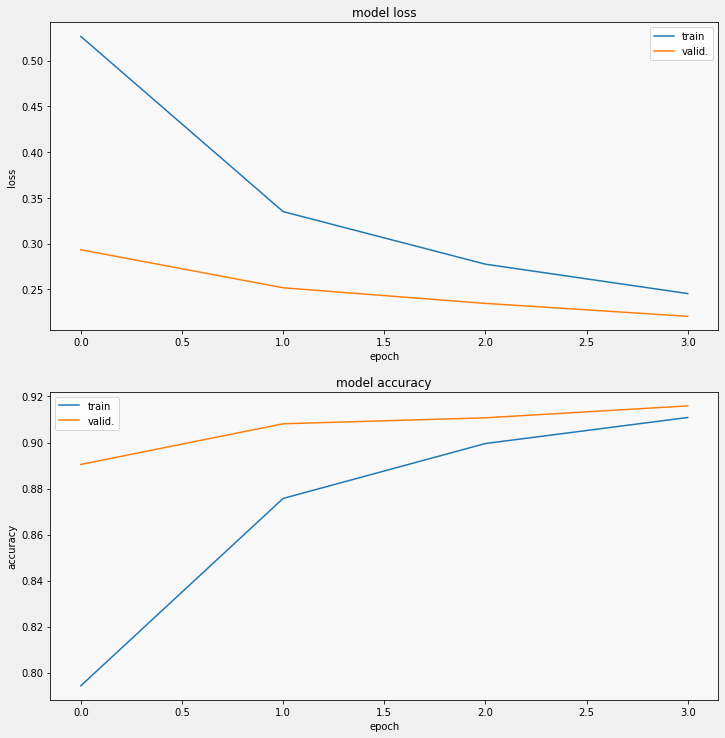

In [ ]:
display_training_curves(history_densenet.history['loss'], history_densenet.history['val_loss'], 'loss', 211)
display_training_curves(history_densenet.history['accuracy'], history_densenet.history['val_accuracy'], 'accuracy', 212)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix

In [ ]:
num_of_test_samples = NUM_TESTING_IMAGES

Confusion Matrix
[[ 743   65   29    2]
 [  22 1109   72    0]
 [  25  114  924   17]
 [   3    0    8 1113]]
Classification Report


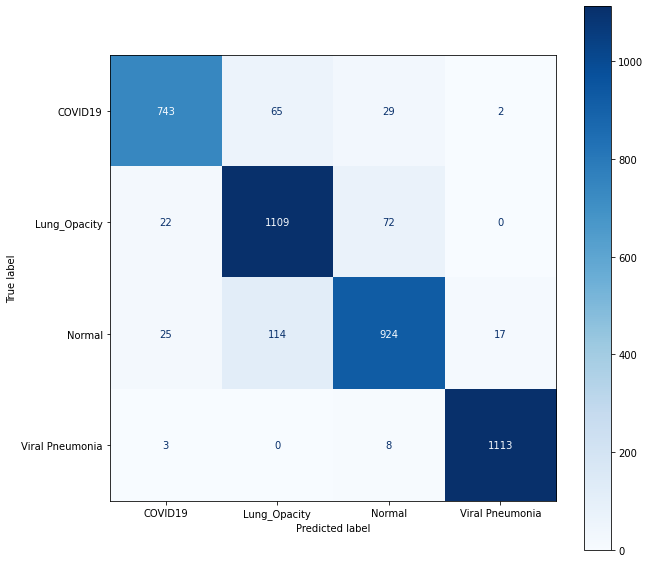

In [ ]:
Y_pred = model_densenet.predict(valid_set, num_of_test_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_set.classes, y_pred))
print('Classification Report')
labels = ['COVID19', 'Lung_Opacity','Normal', 'Viral Pneumonia']


cm = confusion_matrix(valid_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Covid-19', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
print(classification_report(valid_set.classes, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Covid-19       0.94      0.89      0.91       839
   Lung_Opacity       0.86      0.92      0.89      1203
         Normal       0.89      0.86      0.87      1080
Viral Pneumonia       0.98      0.99      0.99      1124

       accuracy                           0.92      4246
      macro avg       0.92      0.91      0.92      4246
   weighted avg       0.92      0.92      0.92      4246



# Gradio implementación

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 35.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 270 kB 61.2 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 212 kB 74.7 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 112 kB 75.7 MB/s 
     |████████████████████████████████| 2.3 MB 64.1 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 4.0 MB 48.7 MB/s 
     |████████████████████████████████| 594 kB 76

In [ ]:
import gradio as gr

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform

In [ ]:
def load(filename):
   np_image = Image.fromarray(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
class_names = ['Covid-19', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
def predict_image(img):
  #image = PIL.Image.open(img)
  image = load(img)
  prediction = model_densenet.predict(image)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23611.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


In [ ]:
model_densenet.save("model_densenet.h5")

##  EfficientNet

In [ ]:
pretrained_efnet = efn.EfficientNetB7(input_shape=(image_size, image_size, 3), weights='noisy-student', include_top=False)

for layer in pretrained_efnet.layers:
  layer.trainable = True 

x2 = pretrained_efnet.output
x2 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_head")(x2)
x2 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x2)
x2 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x2)
model_out = tf.keras.layers.Dense(4, activation='softmax', name="predictions_head")(x2)

model_efnet = Model(inputs=pretrained_efnet.input, outputs=model_out)
model_efnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=categorical_smooth_loss,metrics=['accuracy'])
model_efnet.summary()

258080768/258068648 [==============================] - 32s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 64  1728        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 64  256         ['stem_conv[0][0]']              
                          

In [ ]:
history_efnet = model_efnet.fit(training_set, validation_data=testing_set, callbacks=[MCP_callback], epochs=8)  

Epoch 1/8
   6/1061 [..............................] - ETA: 15:22 - loss: 36.6788 - accuracy: 0.2292

KeyboardInterrupt: ignored

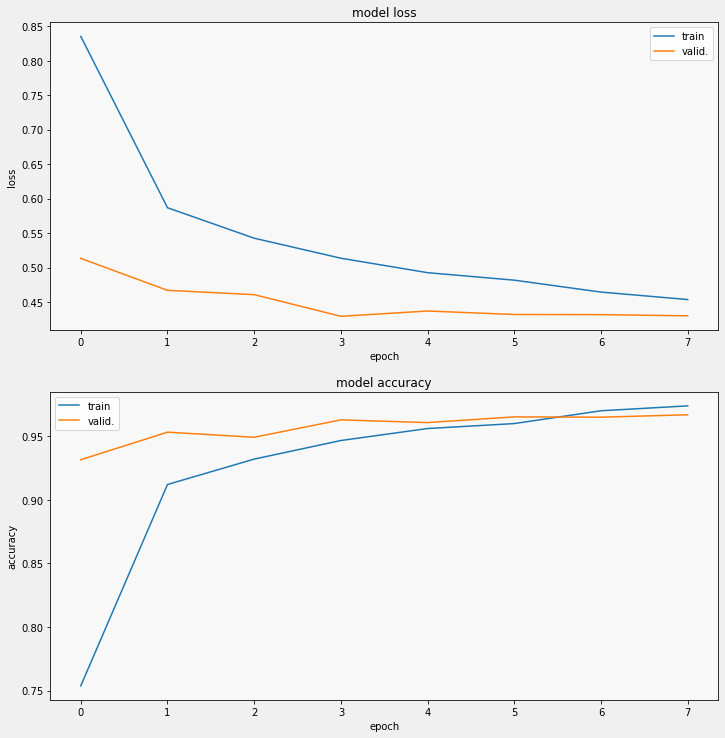

In [ ]:
display_training_curves(history_efnet.history['loss'], history_efnet.history['val_loss'], 'loss', 211)
display_training_curves(history_efnet.history['accuracy'], history_efnet.history['val_accuracy'], 'accuracy', 212)

Confusion Matrix
[[ 829    7    3    0]
 [   3 1140   60    0]
 [   6   51 1022    1]
 [   2    0    8 1114]]
Classification Report


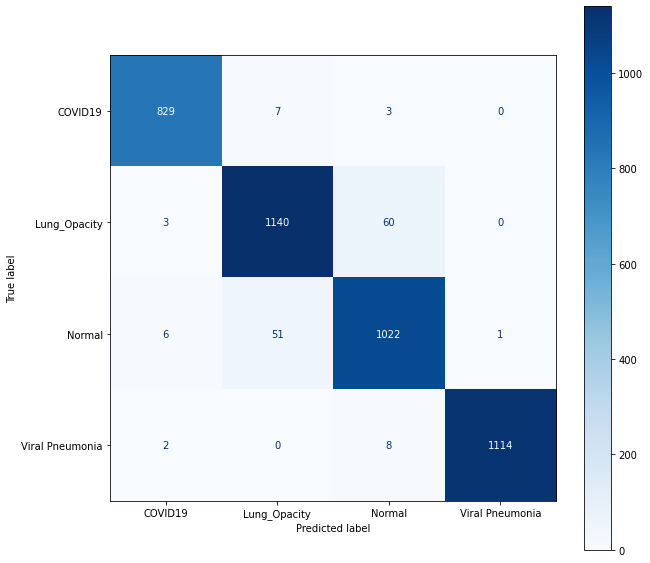

In [ ]:
Y_pred = model_efnet.predict(valid_set, num_of_test_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_set.classes, y_pred))
print('Classification Report')
labels = ['COVID19', 'Lung_Opacity','Normal', 'Viral Pneumonia']


cm = confusion_matrix(valid_set.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
target_names = ['Covid-19', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
print(classification_report(valid_set.classes, y_pred, target_names=target_names,digits=4))

                 precision    recall  f1-score   support

       Covid-19     0.9869    0.9881    0.9875       839
   Lung_Opacity     0.9516    0.9476    0.9496      1203
         Normal     0.9350    0.9463    0.9406      1080
Viral Pneumonia     0.9991    0.9911    0.9951      1124

       accuracy                         0.9668      4246
      macro avg     0.9682    0.9683    0.9682      4246
   weighted avg     0.9669    0.9668    0.9668      4246



In [ ]:
model_efnet.save("model_efnet.h5")